In [1]:
import cobra
from cobra import Reaction

#import Utils_Cobrapy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
cobra_config = cobra.Configuration()

small_model = cobra.io.read_sbml_model('model_mario2013.xml')

Adding exchange reaction EX_EGLU with default bounds for boundary metabolite: EGLU.
Adding exchange reaction EX_EGLC with default bounds for boundary metabolite: EGLC.
Adding exchange reaction EX_ELAC with default bounds for boundary metabolite: ELAC.
Adding exchange reaction EX_EASP with default bounds for boundary metabolite: EASP.
Adding exchange reaction EX_EALA with default bounds for boundary metabolite: EALA.
Adding exchange reaction EX_ENH4 with default bounds for boundary metabolite: ENH4.
Adding exchange reaction EX_EGLN with default bounds for boundary metabolite: EGLN.
Adding exchange reaction EX_Biomass with default bounds for boundary metabolite: Biomass.
Adding exchange reaction EX_CO2 with default bounds for boundary metabolite: CO2.
Adding exchange reaction EX_O2 with default bounds for boundary metabolite: O2.
Adding exchange reaction EX_Pcr with default bounds for boundary metabolite: Pcr.
Adding exchange reaction EX_Cr with default bounds for boundary metabolite: Cr

In [3]:
print(small_model.objective)

Maximize
1.0*Vgrowth - 1.0*Vgrowth_reverse_8d6a6


In [4]:
def heatmap_flux2(minimal_flux=0.05,save=False,**kwargs):
    list_df=list()
    for solution in kwargs["solutions"] :
        series=solution.fluxes[solution.fluxes!=0] #remove 0 values
        for react in series.keys():
            if ('EX' in react) or ('VATPASE' in react) or ('VCK' in react) or ('VLEAK' in react):
                series.pop(react)
        df=series.to_frame()
        df["name"]=df.index
        df = df.drop(df[df.fluxes < minimal_flux].index) #enlève les flux avec une valeur inférieur a minimal_flux
        list_df.append(df)
    #Quadraboucle qui s'assure que chaque DF contient les mêmes labels (que toutes les réactions soient présente dans chaque DF)
    #si ce n'est pas le cas rajoute une ligne avec pour valeur 0 dans les dataframe qui n'ont pas le label (Nom de réaction)
    for df in list_df :
        for i in df.index :
            for df2 in list_df :
                if i not in df2.index :
                    df2.loc[i]=[0,i]
    # combine tous les DF dans un seul DF nommé results
    results=pd.DataFrame()
    results_prov=pd.DataFrame()
    compteur=0
    for name in kwargs["name_columns"] :
        results[name]=list_df[compteur]["fluxes"]
        compteur+=1
    '''for react in l_react:
        line = results.loc[react,:]
        results_prov = results_prov.append(line, ignore_index = True)
    results = results_prov'''

    #plot 
    grid_kws = {"height_ratios": (.7, .3), "hspace": .1}
    fig, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(10,20))
    ax=sns.heatmap(results, ax=ax, cbar_kws={"orientation": "vertical"}, cmap="YlGnBu")
    #savefig
    if save==True :
        fig = ax.get_figure()
        fig.savefig(kwargs["name_plot"]) 
    return results

In [5]:
# Fonction biomass HMR
R5P = small_model.metabolites.get_by_id("R5P")
PALM = small_model.metabolites.get_by_id("PALM")
ATP = small_model.metabolites.get_by_id("ATP")

In [6]:
#small_model.reactions.get_by_id("Vgrowth").lower_bound = 0
#small_model.reactions.get_by_id("Vgrowth").upper_bound = 1

small_model.objective = 'Vgrowth'
small_model.reactions.Vgrowth

Reaction identifier,Vgrowth
Name,Vgrowth
Memory address,0x07f53dd57eee0
Stoichiometry,3.78 ATP + 0.04 EGLN + 0.033 EGLU + 0.029 G6P + 1.86 PALM + 0.024 R5P --> Biomass 3.78 ATP + 0.04 EGLN + 0.033 EGLU + 0.029 G6P + 1.86 PALM + 0.024 R5P --> Biomass
GPR,
Lower bound,0.0
Upper bound,1000.0


In [7]:
# Pour rechanger les coef
small_model.reactions.get_by_id('Vgrowth')
#small_model.reactions.Vgrowth

Reaction identifier,Vgrowth
Name,Vgrowth
Memory address,0x07f53dd57eee0
Stoichiometry,3.78 ATP + 0.04 EGLN + 0.033 EGLU + 0.029 G6P + 1.86 PALM + 0.024 R5P --> Biomass 3.78 ATP + 0.04 EGLN + 0.033 EGLU + 0.029 G6P + 1.86 PALM + 0.024 R5P --> Biomass
GPR,
Lower bound,0.0
Upper bound,1000.0


In [8]:
solution = small_model.optimize()

s = solution.fluxes
dict_fluxes = s.to_frame().to_dict()['fluxes']
dict_fluxes1 = {x:y for x,y in dict_fluxes.items() if y!=0}

dict_fluxes

{'EX_EGLU': -0.9306260575296109,
 'EX_EGLC': -367.99210377890586,
 'EX_ELAC': 297.80033840947544,
 'EX_EASP': -213.19796954314714,
 'EX_EALA': -0.0,
 'EX_ENH4': -213.19796954314714,
 'EX_EGLN': -1.128031584884377,
 'EX_Biomass': 28.200789622109422,
 'EX_CO2': 1000.0,
 'EX_O2': -419.6277495769882,
 'EX_Pcr': 0.0,
 'EX_Cr': -0.0,
 'EX_Pi': -859.024252679075,
 'EX_COA': -419.6277495769882,
 'VACL': 0.0,
 'VAK': 106.59898477157357,
 'VAKGDH': 0.0,
 'VALATA': 0.0,
 'VATPASE': 484.461364918218,
 'VCITS': 0.0,
 'VCK': 0.0,
 'VCS': 0.0,
 'VEP': 201.69204737732662,
 'VG6PDH': 367.1742808798647,
 'VGLDH': 0.0,
 'VGLNS': -213.19796954314714,
 'VGLNT': 0.0,
 'VGLUT': 0.0,
 'VHK': 367.99210377890586,
 'VLDH': 297.80033840947544,
 'VLEAK': 0.0,
 'VMDH': 0.0,
 'VME': 213.19796954314714,
 'VNADPHOX': 0.0,
 'VPALM': 52.453468697123526,
 'VPDH': 419.6277495769882,
 'VPFK': 201.69204737732662,
 'VPGI': 0.0,
 'VPGK': 504.23011844331654,
 'VPK': 504.23011844331654,
 'VPPRIBP': 106.59898477157357,
 'VRESP':

In [9]:
# Petit modèle humain
# Param pour G1 :
small_modelG1 = cobra.io.read_sbml_model('model_mario2013G1.xml')
# PFK
small_modelG1.reactions.get_by_id("VPFK").lower_bound = 30
small_modelG1.reactions.get_by_id("VPFK").upper_bound = 1000
# G6PDH
small_modelG1.reactions.get_by_id("VG6PDH").lower_bound = 0
small_modelG1.reactions.get_by_id("VG6PDH").upper_bound = 100
# TKT
small_modelG1.reactions.get_by_id("VTK").lower_bound = 0
small_modelG1.reactions.get_by_id("VTK").upper_bound = 10
# Palmitate
small_modelG1.reactions.get_by_id("VPALM").lower_bound = 0
small_modelG1.reactions.get_by_id("VPALM").upper_bound = 5

solution_G1 = small_modelG1.optimize()

s = solution_G1.fluxes
dict_fluxes = s.to_frame().to_dict()['fluxes']
dict_fluxes1 = {x:y for x,y in dict_fluxes.items() if y!=0}

# G1
print(f"hk :{dict_fluxes['VHK']}")
print(f"pgi :{dict_fluxes['VPGI']}") 
print(f"pfk :{dict_fluxes['VPFK']}")
print(f"pgk :{dict_fluxes['VPGK']}")
print(f"pk :{dict_fluxes['VPK']}\n")

# S
print(f"g6pdh :{dict_fluxes['VG6PDH']}")
print(f"ep :{dict_fluxes['VEP']}")
# print(f"amp :{dict_fluxes['AMP']}")
print(f"tkt :{dict_fluxes['VTK']}\n")

# TCA cycle
# print(f"pdh :{dict_fluxes['PDH']}")
print(f"cs :{dict_fluxes['VCS']}")
print(f"cits :{dict_fluxes['VCITS']}")
print(f"AKGDH :{dict_fluxes['VAKGDH']}\n")

# Lactate
print(f"ldh :{dict_fluxes['VLDH']}\n")
# G2
#print(f"acl :{dict_fluxes['VACL']}")
print(f"palm :{dict_fluxes['VPALM']}")
print(f"biomass :{dict_fluxes['Vgrowth']}")

Adding exchange reaction EX_EGLU with default bounds for boundary metabolite: EGLU.
Adding exchange reaction EX_EGLC with default bounds for boundary metabolite: EGLC.
Adding exchange reaction EX_ELAC with default bounds for boundary metabolite: ELAC.
Adding exchange reaction EX_EASP with default bounds for boundary metabolite: EASP.
Adding exchange reaction EX_EALA with default bounds for boundary metabolite: EALA.
Adding exchange reaction EX_ENH4 with default bounds for boundary metabolite: ENH4.
Adding exchange reaction EX_EGLN with default bounds for boundary metabolite: EGLN.
Adding exchange reaction EX_Biomass with default bounds for boundary metabolite: Biomass.
Adding exchange reaction EX_CO2 with default bounds for boundary metabolite: CO2.
Adding exchange reaction EX_O2 with default bounds for boundary metabolite: O2.
Adding exchange reaction EX_Pcr with default bounds for boundary metabolite: Pcr.
Adding exchange reaction EX_Cr with default bounds for boundary metabolite: Cr

hk :118.80510752688168
pgi :83.72715053763437
pfk :96.26478494623653
pgk :198.79838709677415
pk :198.79838709677415

g6pdh :35.0
ep :12.537634408602157
tkt :6.268817204301079

cs :40.0
cits :0.0
AKGDH :0.0

ldh :212.56182795698916

palm :5.0
biomass :2.6881720430107525


In [10]:
# Petit modèle humain

small_modelS = cobra.io.read_sbml_model('model_mario2013S.xml')
# Param pour S :
# PFK
small_modelS.reactions.get_by_id("VPFK").lower_bound = 0
small_modelS.reactions.get_by_id("VPFK").upper_bound = 10
# G6PDH
small_modelS.reactions.get_by_id("VG6PDH").lower_bound = 0
small_modelS.reactions.get_by_id("VG6PDH").upper_bound = 1000
# TKT
small_modelS.reactions.get_by_id("VTK").lower_bound = 0
small_modelS.reactions.get_by_id("VTK").upper_bound = 5
# Palmitate
small_modelS.reactions.get_by_id("VPALM").lower_bound = 0
small_modelS.reactions.get_by_id("VPALM").upper_bound = 5

solution_S = small_modelS.optimize()

s = solution_S.fluxes
dict_fluxes = s.to_frame().to_dict()['fluxes']
dict_fluxes1 = {x:y for x,y in dict_fluxes.items() if y!=0}

# G1
print(f"hk :{dict_fluxes['VHK']}")
print(f"pgi :{dict_fluxes['VPGI']}") 
print(f"pfk :{dict_fluxes['VPFK']}")
print(f"pgk :{dict_fluxes['VPGK']}")
print(f"pk :{dict_fluxes['VPK']}\n")

# S
print(f"g6pdh :{dict_fluxes['VG6PDH']}")
print(f"ep :{dict_fluxes['VEP']}")
print(f"amp :{dict_fluxes['VPPRIBP']}")
print(f"tkt :{dict_fluxes['VTK']}\n")

# TCA cycle
# print(f"pdh :{dict_fluxes['PDH']}")
print(f"cs :{dict_fluxes['VCS']}")
print(f"cits :{dict_fluxes['VCITS']}")
print(f"AKGDH :{dict_fluxes['VAKGDH']}\n")

# Lactate
print(f"ldh :{dict_fluxes['VLDH']}\n")
# G2
#print(f"acl :{dict_fluxes['VACL']}")
print(f"palm :{dict_fluxes['VPALM']}")
print(f"biomass :{dict_fluxes['Vgrowth']}")

Adding exchange reaction EX_EGLU with default bounds for boundary metabolite: EGLU.
Adding exchange reaction EX_EGLC with default bounds for boundary metabolite: EGLC.
Adding exchange reaction EX_ELAC with default bounds for boundary metabolite: ELAC.
Adding exchange reaction EX_EASP with default bounds for boundary metabolite: EASP.
Adding exchange reaction EX_EALA with default bounds for boundary metabolite: EALA.
Adding exchange reaction EX_ENH4 with default bounds for boundary metabolite: ENH4.
Adding exchange reaction EX_EGLN with default bounds for boundary metabolite: EGLN.
Adding exchange reaction EX_Biomass with default bounds for boundary metabolite: Biomass.
Adding exchange reaction EX_CO2 with default bounds for boundary metabolite: CO2.
Adding exchange reaction EX_O2 with default bounds for boundary metabolite: O2.
Adding exchange reaction EX_Pcr with default bounds for boundary metabolite: Pcr.
Adding exchange reaction EX_Cr with default bounds for boundary metabolite: Cr

hk :20.071267432321573
pgi :0.0
pfk :10.0
pgk :25.0
pk :25.0

g6pdh :20.026661197703035
ep :10.0
amp :5.814191960623459
tkt :5.0

cs :0.0
cits :0.0
AKGDH :0.0

ldh :13.740771123872026

palm :2.860951599671862
biomass :1.538146021328958


In [11]:
# Petit modèle humain

small_modelG2 = cobra.io.read_sbml_model('model_mario2013G2.xml')
# Param pour G2 :
# PFK
small_modelG2.reactions.get_by_id("VPFK").lower_bound = 0
small_modelG2.reactions.get_by_id("VPFK").upper_bound = 100
# G6PDH
small_modelG2.reactions.get_by_id("VG6PDH").lower_bound = 0
small_modelG2.reactions.get_by_id("VG6PDH").upper_bound = 1000
# TKT
small_modelG2.reactions.get_by_id("VTK").lower_bound = 0
small_modelG2.reactions.get_by_id("VTK").upper_bound = 1000
# Palmitate
small_modelG2.reactions.get_by_id("VPALM").lower_bound = 0
small_modelG2.reactions.get_by_id("VPALM").upper_bound = 1000


small_modelG2.reactions.get_by_id("VLDH").lower_bound = 0
small_modelG2.reactions.get_by_id("VLDH").upper_bound = 0

solution_G2 = small_modelG2.optimize()

s = solution_G2.fluxes
dict_fluxes = s.to_frame().to_dict()['fluxes']
dict_fluxes1 = {x:y for x,y in dict_fluxes.items() if y!=0}

# G1
print(f"hk :{dict_fluxes['VHK']}")
print(f"pgi :{dict_fluxes['VPGI']}") 
print(f"pfk :{dict_fluxes['VPFK']}")
print(f"pgk :{dict_fluxes['VPGK']}")
print(f"pk :{dict_fluxes['VPK']}\n")

# S
print(f"g6pdh :{dict_fluxes['VG6PDH']}")
print(f"ep :{dict_fluxes['VEP']}")
# print(f"amp :{dict_fluxes['AMP']}")
print(f"tkt :{dict_fluxes['VTK']}\n")

# TCA cycle
# print(f"pdh :{dict_fluxes['PDH']}")
print(f"cs :{dict_fluxes['VCS']}")
print(f"cits :{dict_fluxes['VCITS']}")
print(f"AKGDH :{dict_fluxes['VAKGDH']}")
print(f"pdh :{dict_fluxes['VPDH']}\n")

# Lactate
print(f"ldh :{dict_fluxes['VLDH']}\n")
# G2
#print(f"acl :{dict_fluxes['VACL']}")
print(f"VCS :{dict_fluxes['VCS']}")
print(f"palm :{dict_fluxes['VPALM']}")
print(f"biomass :{dict_fluxes['Vgrowth']}")

Adding exchange reaction EX_EGLU with default bounds for boundary metabolite: EGLU.
Adding exchange reaction EX_EGLC with default bounds for boundary metabolite: EGLC.
Adding exchange reaction EX_ELAC with default bounds for boundary metabolite: ELAC.
Adding exchange reaction EX_EASP with default bounds for boundary metabolite: EASP.
Adding exchange reaction EX_EALA with default bounds for boundary metabolite: EALA.
Adding exchange reaction EX_ENH4 with default bounds for boundary metabolite: ENH4.
Adding exchange reaction EX_EGLN with default bounds for boundary metabolite: EGLN.
Adding exchange reaction EX_Biomass with default bounds for boundary metabolite: Biomass.
Adding exchange reaction EX_CO2 with default bounds for boundary metabolite: CO2.
Adding exchange reaction EX_O2 with default bounds for boundary metabolite: O2.
Adding exchange reaction EX_Pcr with default bounds for boundary metabolite: Pcr.
Adding exchange reaction EX_Cr with default bounds for boundary metabolite: Cr

hk :155.14193300643942
pgi :0.0
pfk :100.0
pgk :250.0
pk :250.0

g6pdh :155.07768653630296
ep :100.0
tkt :50.0

cs :89.51674839014592
cits :89.51674839014592
AKGDH :89.51674839014592
pdh :266.7483901459207

ldh :0.0

VCS :89.51674839014592
palm :22.15395521947185
biomass :2.215395521947185


In [12]:
solution_G2.fluxes

EX_EGLU        -0.073108
EX_EGLC      -155.141933
EX_ELAC        -0.000000
EX_EASP       -16.748390
EX_EALA        -0.000000
EX_ENH4       -16.748390
EX_EGLN        -0.088616
EX_Biomass      2.215396
EX_CO2        707.124712
EX_O2        -430.564040
EX_Pcr         -0.000000
EX_Cr           0.000000
EX_Pi        -193.716400
EX_COA       -177.231642
VACL            0.000000
VAK             8.374195
VAKGDH         89.516748
VALATA          0.000000
VATPASE       145.800349
VCITS          89.516748
VCK             0.000000
VCS            89.516748
VEP           100.000000
VG6PDH        155.077687
VGLDH           0.000000
VGLNS         -16.748390
VGLNT           0.000000
VGLUT           0.000000
VHK           155.141933
VLDH            0.000000
VLEAK         430.564040
VMDH           89.516748
VME            16.748390
VNADPHOX        0.000000
VPALM          22.153955
VPDH          266.748390
VPFK          100.000000
VPGI            0.000000
VPGK          250.000000
VPK           250.000000


,G1,S,G2
VACL,40.000000,0.000000,0.000000
VAK,26.881720,5.814192,8.374195
VCS,40.000000,0.000000,89.516748
VEP,12.537634,10.000000,100.000000
VG6PDH,35.000000,20.026661,155.077687
VHK,118.805108,20.071267,155.141933
VLDH,212.561828,13.740771,0.000000
VME,53.763441,11.628384,16.748390
VPALM,5.000000,2.860952,22.153955
VPDH,40.000000,22.887613,266.748390


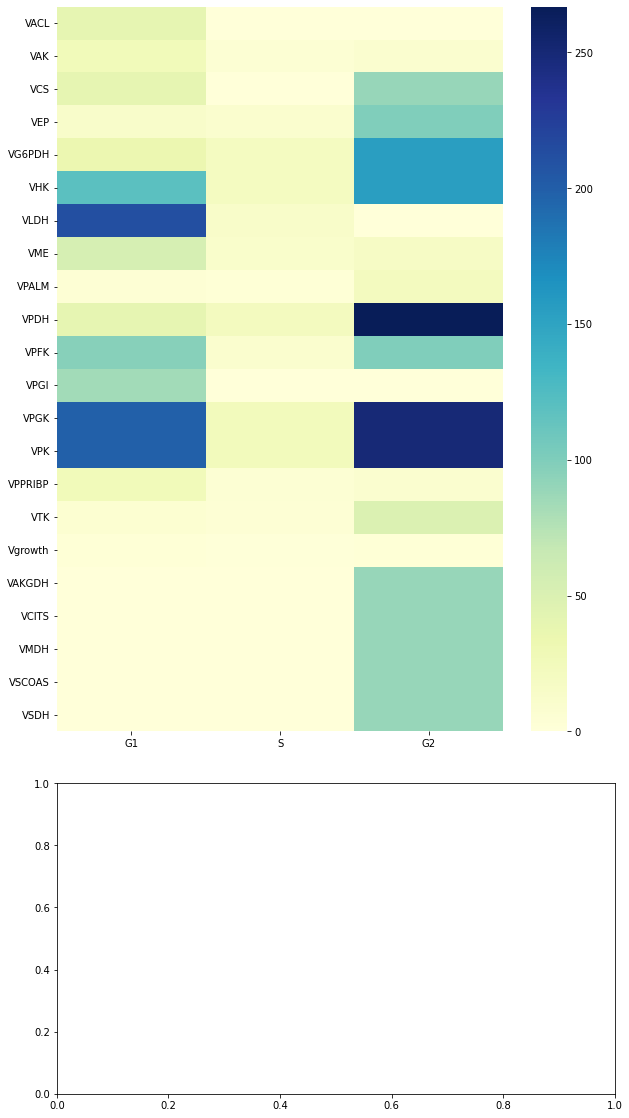

In [13]:
heatmap_flux2(save=True,solutions=[solution_G1, solution_S, solution_G2],
                           name_columns=["G1", "S", "G2"], name_plot = "heatmap_cellcycle2.png")